<a href="https://colab.research.google.com/github/audwls4545/metaverse/blob/main/%EC%8B%A4%EC%8A%B503_ClusteringModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning with Python 
### 실습03.Clustering Modeling

1. Load Data & Explore Data
2. Data Visualization
3. Model Train
4. Model Visualize


#### 1. Load Data & Explore Data

In [2]:
# 1. Load Data 

import pandas as pd

data = pd.read_csv('10강_데이터_Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# 1-1. Data Info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### 2. Data Visualization

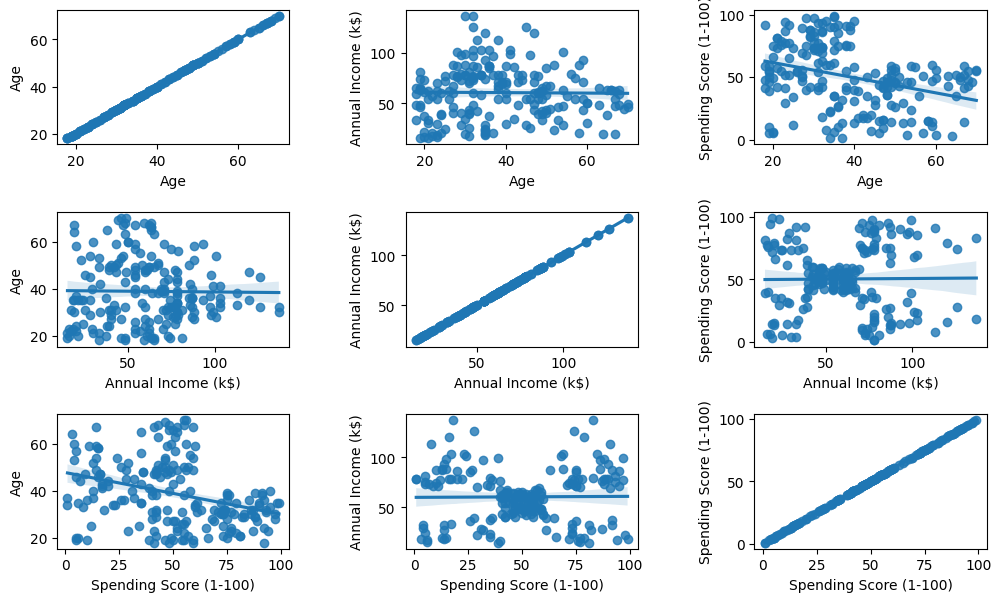

In [4]:
# 2-1. Visualization : Age, Income, Score

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1, figsize=(12, 7))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  for y in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.regplot(x = x, y = y, data = data)
plt.show()

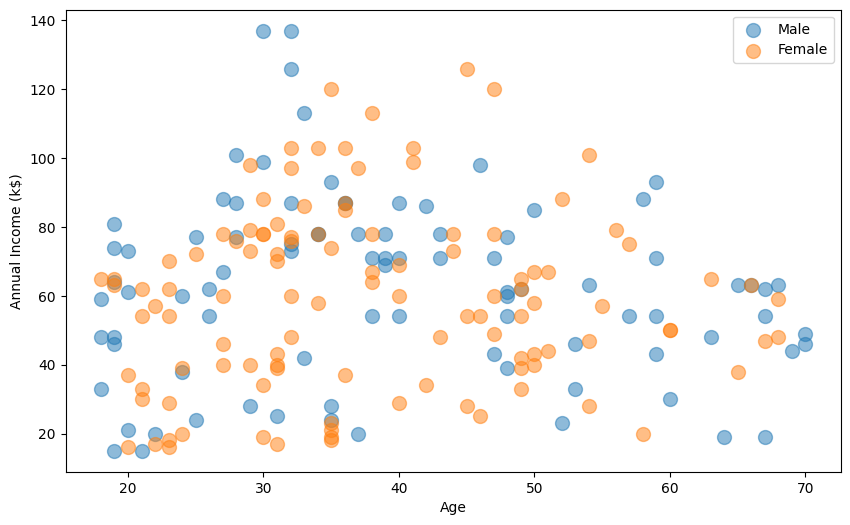

In [5]:
# 2-2. Visualization : Gender, Age, Income

plt.figure(1, figsize=(10,6))

for gender in ['Male', 'Female']:
  plt.scatter(x='Age', y='Annual Income (k$)', data = data[data['Gender']==gender],
              s=100, alpha=0.5, label=gender)

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

In [6]:
# 2-3. X 선택(2D) Annual Incom, Spending Score

# X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
X = data.iloc[:, 3:].values
print(X[:5])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


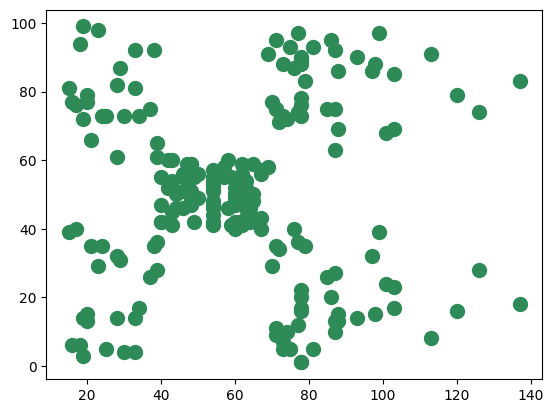

In [7]:
# 2-4. X 시각화

plt.scatter(X[:,0], X[:, 1], s=100, color='seagreen')

#### 3. Model Train

In [8]:
# 3-1. kMean

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, random_state=0)

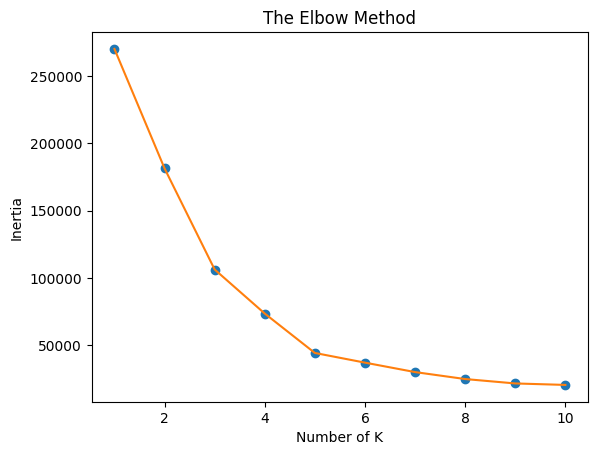

In [10]:
# 3-2. Find K

inertia = []
for n in range(1, 11):
  kmeans = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, random_state=0)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

plt.plot(range(1,11), inertia, 'o')
plt.plot(range(1,11), inertia, '-')
plt.title('The Elbow Method')
plt.xlabel('Number of K')
plt.ylabel('Inertia')
plt.show()

In [11]:
# 3-3. Fit Kmeans

kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=0)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


#### 4. Model Visualize


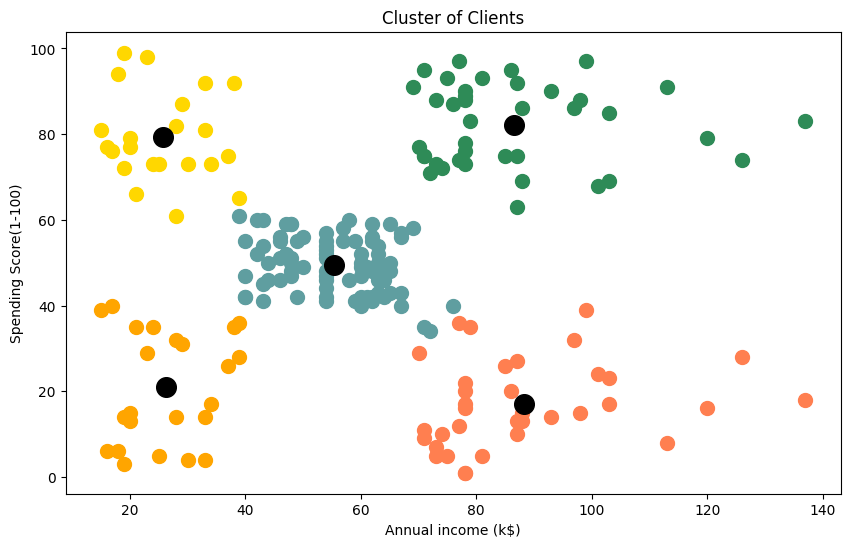

In [12]:
# 4. Visualize Clusters

plt.figure(1, figsize=(10,6))

plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='coral')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='cadetblue')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='seagreen')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='gold')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='orange')

plt.title('Cluster of Clients')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending Score(1-100)')

# Visualize Centroid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black')

plt.show()